In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter, OrderedDict

style.use('ggplot')

In [2]:
df = pd.read_csv('data/checkins.csv')

In [3]:
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396634 entries, 0 to 396633
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          396634 non-null  int64  
 1   user_id     396634 non-null  int64  
 2   venue_id    396634 non-null  int64  
 3   latitude    396634 non-null  float64
 4   longitude   396634 non-null  float64
 5   created_at  396634 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 18.2+ MB


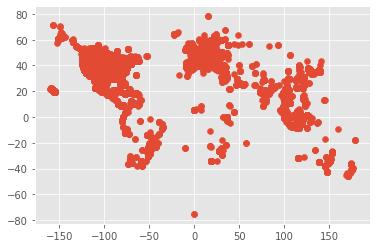

In [5]:
plt.scatter(df.longitude, df.latitude)
plt.show()

In [6]:
df_short = df.loc[:, ['latitude', 'longitude']]
df_short = df_short.sample(n=100000)

In [7]:
df_short.head()

,latitude,longitude
143274,40.650000,-73.950000
346209,45.365676,-122.612314
376532,40.440625,-79.995886
299089,40.746490,-74.156255
338349,34.021122,-118.396467


In [8]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 143274 to 275803
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   100000 non-null  float64
 1   longitude  100000 non-null  float64
dtypes: float64(2)
memory usage: 2.3 MB


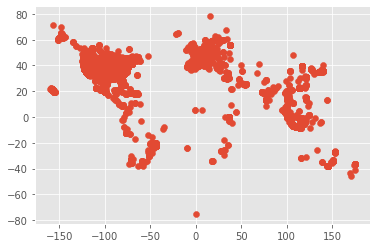

In [9]:
plt.scatter(df_short.longitude, df_short.latitude)
plt.show()

In [10]:
ms = MeanShift(bandwidth=0.1)
ms.fit(df_short)

MeanShift(bandwidth=0.1)

In [11]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# ms.predict(df_short)

print(n_clusters_)

3574


In [12]:
cnts = Counter(labels)

In [13]:
centers_15 = []
for val, key in zip(cnts.values(), cnts.keys()):
    if val > 15:
        centers_15.append(key)

In [14]:
cluster_centers_15 = []

for i in range(n_clusters_):
    if i in centers_15:
        cluster_centers_15.append(cluster_centers[i])

In [15]:
len(cluster_centers_15)

611

In [16]:
def distanceCalculator(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [17]:
carnival_offices = pd.DataFrame({
    'city':['Los-Angeles', 'Miami', 'London', 'Amsterdam', 'Beijing', 'Sydney'], 
    'latitude':[33.751277, 25.867736, 51.503016, 52.378894, 39.366487, -33.868457],
    'longitude':[-118.188740, -80.324116, -0.075479, 4.885084, 117.036146, 151.205134]
    })

In [18]:
carnival_offices

,city,latitude,longitude
0,Los-Angeles,33.751277,-118.188740
1,Miami,25.867736,-80.324116
2,London,51.503016,-0.075479
3,Amsterdam,52.378894,4.885084
4,Beijing,39.366487,117.036146
5,Sydney,-33.868457,151.205134


In [19]:
dist = {}

for i in range(len(cluster_centers_15)):
    for j in range(carnival_offices.shape[0]):
        d = distanceCalculator(x1 = cluster_centers_15[i][1], y1 = cluster_centers_15[i][0], x2 = carnival_offices.longitude[j], y2 = carnival_offices.latitude[j])
        dist[d] = cluster_centers_15[i]

In [33]:
od = OrderedDict(sorted(dist.items()))

In [34]:
print(list(od.items())[0][1][0], list(od.items())[0][1][1])

-33.865789873170726 151.20620203658547
